In [1]:
import pandas as pd
data = pd.read_csv("/content/letter-recognition.data")

In [ ]:
data

,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


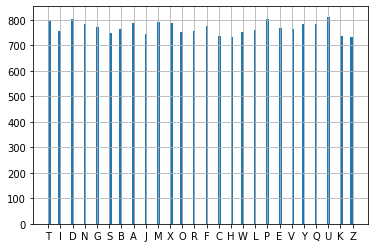

In [2]:
data['Label'].hist(bins=120)

In [3]:
train_data = data.sample(frac=0.7)
test_data = data.drop(train_data.index)

In [8]:
import numpy as np
def label_data(label):
  labels = np.array(train_data['Label'].unique())
  df = []
  for l in labels:
    if(l==label):
      df.append(train_data[train_data['Label']==l])
    else:
      df.append(train_data[train_data['Label']==l].sample(frac=0.04))
  return pd.concat(df)

In [9]:
from sklearn.svm import OneClassSVM
OCSVM_for_label = {}
int_to_letter = {}
for i,l in enumerate(np.array(train_data['Label'].unique())):
  int_to_letter[i]=l
  data_label = label_data(l)
  data_label['Label'].replace()
  clf = OneClassSVM(gamma='auto',kernel='rbf').fit(data_label.drop('Label',axis=1))
  OCSVM_for_label[l]=clf

In [10]:
predictions = []
for let in OCSVM_for_label:
  predictions.append(OCSVM_for_label[let].decision_function(test_data.drop('Label',axis=1)))

In [11]:
predictions = np.array(predictions).T

In [12]:
ans = []
for i,pred in enumerate(predictions):
  ans.append(int_to_letter[pred.argmax()])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Label'], ans))

              precision    recall  f1-score   support

           A       0.96      0.96      0.96       227
           B       0.88      0.65      0.75       260
           C       0.75      0.93      0.83       212
           D       0.77      0.81      0.79       245
           E       0.83      0.73      0.77       216
           F       0.88      0.76      0.82       236
           G       0.77      0.56      0.65       235
           H       0.80      0.57      0.67       235
           I       0.82      0.92      0.87       199
           J       0.88      0.97      0.92       232
           K       0.76      0.88      0.82       217
           L       0.93      0.93      0.93       226
           M       0.76      0.99      0.86       232
           N       0.86      0.91      0.89       253
           O       0.68      0.75      0.71       217
           P       0.88      0.90      0.89       253
           Q       0.83      0.89      0.86       249
           R       0.86    

In [14]:
from sklearn.svm import OneClassSVM
OCSVM_for_label = {}
int_to_letter = {}
for i,l in enumerate(np.array(train_data['Label'].unique())):
  int_to_letter[i]=l
  data_label = label_data(l)
  data_label['Label'].replace()
  clf = OneClassSVM(gamma='auto',kernel='poly').fit(data_label.drop('Label',axis=1))
  OCSVM_for_label[l]=clf

In [15]:
predictions = []
for let in OCSVM_for_label:
  predictions.append(OCSVM_for_label[let].decision_function(test_data.drop('Label',axis=1)))

In [16]:
predictions = np.array(predictions).T

In [17]:
ans = []
for i,pred in enumerate(predictions):
  ans.append(int_to_letter[pred.argmax()])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Label'], ans))

              precision    recall  f1-score   support

           A       0.06      0.47      0.11       227
           B       0.00      0.00      0.00       260
           C       0.00      0.00      0.00       212
           D       0.05      0.08      0.06       245
           E       0.00      0.00      0.00       216
           F       0.24      0.09      0.13       236
           G       0.00      0.00      0.00       235
           H       0.00      0.00      0.00       235
           I       0.05      0.17      0.08       199
           J       0.75      0.01      0.03       232
           K       0.00      0.00      0.00       217
           L       0.07      0.75      0.13       226
           M       0.26      0.14      0.18       232
           N       0.18      0.07      0.10       253
           O       0.00      0.00      0.00       217
           P       0.87      0.11      0.19       253
           Q       0.80      0.03      0.06       249
           R       0.18    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.svm import OneClassSVM
OCSVM_for_label = {}
int_to_letter = {}
for i,l in enumerate(np.array(train_data['Label'].unique())):
  int_to_letter[i]=l
  data_label = label_data(l)
  data_label['Label'].replace()
  clf = OneClassSVM(gamma='auto',kernel='linear').fit(data_label.drop('Label',axis=1))
  OCSVM_for_label[l]=clf

In [20]:
predictions = []
for let in OCSVM_for_label:
  predictions.append(OCSVM_for_label[let].decision_function(test_data.drop('Label',axis=1)))

In [21]:
predictions = np.array(predictions).T

In [22]:
ans = []
for i,pred in enumerate(predictions):
  ans.append(int_to_letter[pred.argmax()])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Label'], ans))

              precision    recall  f1-score   support

           A       0.07      0.90      0.12       227
           B       0.00      0.00      0.00       260
           C       0.00      0.00      0.00       212
           D       0.00      0.00      0.00       245
           E       0.00      0.00      0.00       216
           F       0.44      0.02      0.03       236
           G       0.00      0.00      0.00       235
           H       0.00      0.00      0.00       235
           I       0.05      0.19      0.08       199
           J       0.00      0.00      0.00       232
           K       0.00      0.00      0.00       217
           L       0.08      0.77      0.15       226
           M       0.80      0.03      0.07       232
           N       0.17      0.00      0.01       253
           O       0.00      0.00      0.00       217
           P       1.00      0.04      0.08       253
           Q       0.00      0.00      0.00       249
           R       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.svm import OneClassSVM
OCSVM_for_label = {}
int_to_letter = {}
for i,l in enumerate(np.array(train_data['Label'].unique())):
  int_to_letter[i]=l
  data_label = label_data(l)
  data_label['Label'].replace()
  clf = OneClassSVM(gamma='auto',kernel='sigmoid').fit(data_label.drop('Label',axis=1))
  OCSVM_for_label[l]=clf

In [25]:
predictions = []
for let in OCSVM_for_label:
  predictions.append(OCSVM_for_label[let].decision_function(test_data.drop('Label',axis=1)))

In [26]:
predictions = np.array(predictions).T

In [27]:
ans = []
for i,pred in enumerate(predictions):
  ans.append(int_to_letter[pred.argmax()])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Label'], ans))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       227
           B       0.00      0.00      0.00       260
           C       0.00      0.00      0.00       212
           D       0.00      0.00      0.00       245
           E       0.00      0.00      0.00       216
           F       0.00      0.00      0.00       236
           G       0.00      0.00      0.00       235
           H       0.00      0.00      0.00       235
           I       0.00      0.00      0.00       199
           J       0.00      0.00      0.00       232
           K       0.00      0.00      0.00       217
           L       0.00      0.00      0.00       226
           M       0.00      0.00      0.00       232
           N       0.00      0.00      0.00       253
           O       0.00      0.00      0.00       217
           P       0.00      0.00      0.00       253
           Q       0.00      0.00      0.00       249
           R       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
